## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation='relu', name='hidden_layer'+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation='relu', name='hidden_layer'+str(i+1))(x)
            
    out = keras.layers.Dense(units=10, activation='softmax', name='output')(x)
    
    model = keras.models.Model(inputs=[input_layer], output=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
lr = 1e-2
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0, 0.3, 0.5, 0.7, 0.95, 1]

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for m in MOMENTUM:
    keras.backend.clear_session()
    print('Experiment with MOMENTUM = %.6f' % (m))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    opt = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=m)
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=opt)
    
    model.fit(x_train, y_train,
              epochs=EPOCHS,
              batch_size=BATCH_SIZE,
              validation_data=(x_test, y_test),
              shuffle=True)
    
    #Collect results
    train_loss = model.history.history['loss']
    valid_loss = model.history.history['val_loss']
    train_acc = model.history.history['accuracy']
    valid_acc = model.history.history['val_accuracy']
    
    exp_name_tag = 'exp-momentum-%s' % str(m)
    results[exp_name_tag] = {'train-loss': train_loss, 
                             'valid-loss': valid_loss, 
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with MOMENTUM = 0.000000


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`
  from ipykernel import kernelapp as app


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 13s 256

50000/50000 [==============================] - 12s 241us/step - loss: 1.2475 - accuracy: 0.5638 - val_loss: 1.4605 - val_accuracy: 0.4860
Epoch 49/50
50000/50000 [==============================] - 12s 241us/step - loss: 1.2539 - accuracy: 0.5601 - val_loss: 1.5354 - val_accuracy: 0.4588
Epoch 50/50
50000/50000 [==============================] - 12s 243us/step - loss: 1.2422 - accuracy: 0.5647 - val_loss: 1.5158 - val_accuracy: 0.4618
Experiment with MOMENTUM = 0.300000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_______________________________________________

50000/50000 [==============================] - 12s 247us/step - loss: 1.1744 - accuracy: 0.5889 - val_loss: 1.5061 - val_accuracy: 0.4590
Epoch 46/50
50000/50000 [==============================] - 12s 246us/step - loss: 1.1720 - accuracy: 0.5887 - val_loss: 1.4178 - val_accuracy: 0.4989
Epoch 47/50
50000/50000 [==============================] - 12s 248us/step - loss: 1.1604 - accuracy: 0.5927 - val_loss: 1.3903 - val_accuracy: 0.5131
Epoch 48/50
50000/50000 [==============================] - 12s 241us/step - loss: 1.1538 - accuracy: 0.5961 - val_loss: 1.4407 - val_accuracy: 0.4955
Epoch 49/50
50000/50000 [==============================] - 12s 245us/step - loss: 1.1448 - accuracy: 0.5989 - val_loss: 1.3392 - val_accuracy: 0.5236
Epoch 50/50
50000/50000 [==============================] - 12s 242us/step - loss: 1.1426 - accuracy: 0.6004 - val_loss: 1.3189 - val_accuracy: 0.5332
Experiment with MOMENTUM = 0.500000
Model: "model_1"
___________________________________________________________

50000/50000 [==============================] - 13s 253us/step - loss: 1.1184 - accuracy: 0.6083 - val_loss: 1.4668 - val_accuracy: 0.4955
Epoch 43/50
50000/50000 [==============================] - 12s 245us/step - loss: 1.1067 - accuracy: 0.6120 - val_loss: 1.3948 - val_accuracy: 0.5042
Epoch 44/50
50000/50000 [==============================] - 12s 246us/step - loss: 1.1029 - accuracy: 0.6134 - val_loss: 1.4019 - val_accuracy: 0.5129
Epoch 45/50
50000/50000 [==============================] - 12s 241us/step - loss: 1.0848 - accuracy: 0.6208 - val_loss: 1.4394 - val_accuracy: 0.4942
Epoch 46/50
50000/50000 [==============================] - 12s 240us/step - loss: 1.0806 - accuracy: 0.6219 - val_loss: 1.4061 - val_accuracy: 0.5035
Epoch 47/50
50000/50000 [==============================] - 13s 254us/step - loss: 1.0717 - accuracy: 0.6230 - val_loss: 1.5606 - val_accuracy: 0.4643
Epoch 48/50
50000/50000 [==============================] - 12s 238us/step - loss: 1.0658 - accuracy: 0.6270 - va

50000/50000 [==============================] - 12s 239us/step - loss: 0.9792 - accuracy: 0.6551 - val_loss: 1.5226 - val_accuracy: 0.4929
Epoch 40/50
50000/50000 [==============================] - 12s 238us/step - loss: 0.9737 - accuracy: 0.6580 - val_loss: 1.4456 - val_accuracy: 0.5096
Epoch 41/50
50000/50000 [==============================] - 12s 242us/step - loss: 0.9562 - accuracy: 0.6652 - val_loss: 1.5567 - val_accuracy: 0.4879
Epoch 42/50
50000/50000 [==============================] - 12s 241us/step - loss: 0.9476 - accuracy: 0.6670 - val_loss: 1.5428 - val_accuracy: 0.4814
Epoch 43/50
50000/50000 [==============================] - 12s 244us/step - loss: 0.9389 - accuracy: 0.6701 - val_loss: 1.5459 - val_accuracy: 0.4873
Epoch 44/50
50000/50000 [==============================] - 12s 243us/step - loss: 0.9197 - accuracy: 0.6781 - val_loss: 1.4320 - val_accuracy: 0.5107
Epoch 45/50
50000/50000 [==============================] - 12s 244us/step - loss: 0.9111 - accuracy: 0.6820 - va

50000/50000 [==============================] - 13s 253us/step - loss: 0.6270 - accuracy: 0.7749 - val_loss: 1.7165 - val_accuracy: 0.5261
Epoch 37/50
50000/50000 [==============================] - 12s 245us/step - loss: 0.6006 - accuracy: 0.7825 - val_loss: 1.7437 - val_accuracy: 0.5255
Epoch 38/50
50000/50000 [==============================] - 12s 245us/step - loss: 0.5761 - accuracy: 0.7925 - val_loss: 1.7729 - val_accuracy: 0.5275
Epoch 39/50
50000/50000 [==============================] - 13s 252us/step - loss: 0.5582 - accuracy: 0.8026 - val_loss: 1.8516 - val_accuracy: 0.5233
Epoch 40/50
50000/50000 [==============================] - 12s 246us/step - loss: 0.5498 - accuracy: 0.8033 - val_loss: 1.8049 - val_accuracy: 0.5304
Epoch 41/50
50000/50000 [==============================] - 13s 256us/step - loss: 0.5188 - accuracy: 0.8128 - val_loss: 1.8965 - val_accuracy: 0.5317
Epoch 42/50
50000/50000 [==============================] - 13s 256us/step - loss: 0.5052 - accuracy: 0.8183 - va

50000/50000 [==============================] - 12s 237us/step - loss: 2.3100 - accuracy: 0.1012 - val_loss: 2.3138 - val_accuracy: 0.1000
Epoch 34/50
50000/50000 [==============================] - 13s 256us/step - loss: 2.3108 - accuracy: 0.0996 - val_loss: 2.3123 - val_accuracy: 0.1000
Epoch 35/50
50000/50000 [==============================] - 12s 241us/step - loss: 2.3111 - accuracy: 0.0968 - val_loss: 2.3141 - val_accuracy: 0.1000
Epoch 36/50
50000/50000 [==============================] - 12s 244us/step - loss: 2.3099 - accuracy: 0.0995 - val_loss: 2.3067 - val_accuracy: 0.1000
Epoch 37/50
50000/50000 [==============================] - 12s 247us/step - loss: 2.3106 - accuracy: 0.1014 - val_loss: 2.3099 - val_accuracy: 0.1000
Epoch 38/50
50000/50000 [==============================] - 12s 241us/step - loss: 2.3131 - accuracy: 0.0992 - val_loss: 2.3093 - val_accuracy: 0.1000
Epoch 39/50
50000/50000 [==============================] - 12s 238us/step - loss: 2.3129 - accuracy: 0.1017 - va

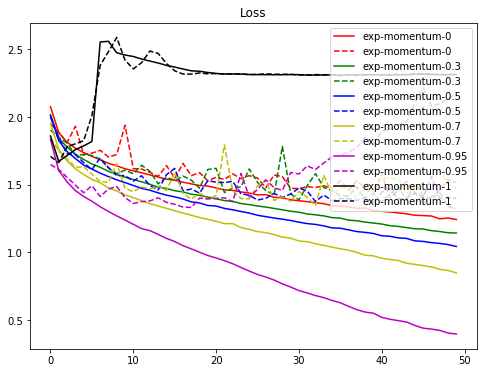

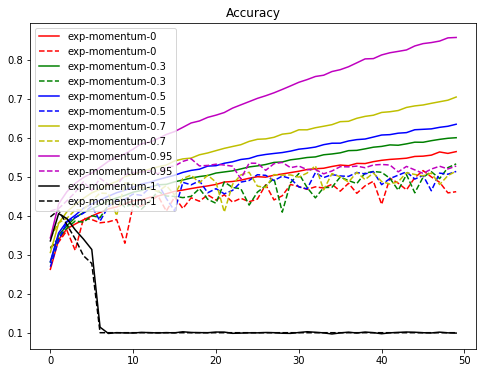

In [8]:
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ['r', 'g', 'b', 'y', 'm', 'k']

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title('Accuracy')
plt.legend()
plt.show()
    